In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

# import VGG 19 neural_net and keras Model API
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.neural_nets import Model

In [ ]:
def load_and_process_image(image_path):
    img = load_img(image_path)
    # convert image to array
    img = img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    return img

In [ ]:
def deprocess(img):
    # perform the inverse of the pre processing step
    img[:, :, 0] += 103.939
    img[:, :, 1] += 116.779
    img[:, :, 2] += 123.68
    # convert RGB to BGR
    img = img[:, :, ::-1]

    img = np.clip(img, 0, 255).astype('uint8')
    return img


def display_image(image):
    # remove one dimension if image has 4 dimension
    if len(image.shape) == 4:
        img = np.squeeze(image, axis=0)

    img = deprocess(img)

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    return

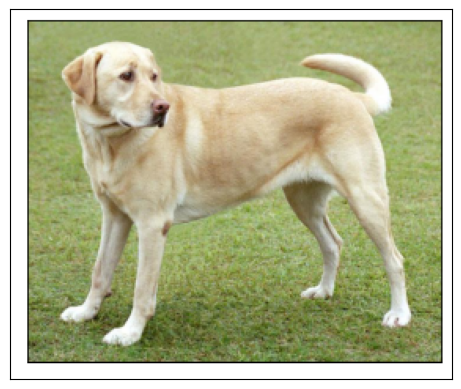

In [59]:
content_img = load_and_process_image('/content/content.png')
display_image(content_img)


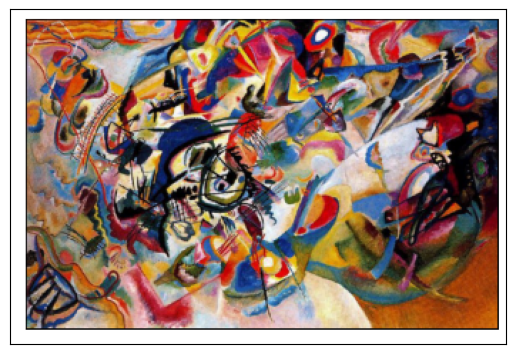

In [ ]:

# load style image
style_img = load_and_process_image('/content/style.png')
display_image(style_img)

In [ ]:
neural_net = VGG19(
    include_top=False,
    weights='imagenet'
)
# set training to False
neural_net.trainable = False
# Print details of different layers

neural_net.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [30]:
content_layer = 'block5_conv2'
content_neural_net = Model(
    inputs=neural_net.input,
    outputs=neural_net.get_layer(content_layer).output
)
content_neural_net.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,304,768 (58.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 15,304,768 (58.38 MB)

In [31]:
style_layers = [
    'block1_conv1',
    'block3_conv1',
    'block5_conv1'
]
style_neural_nets = [Model(inputs=neural_net.input,
                      outputs=neural_net.get_layer(layer).output) for layer in style_layers]

In [32]:
def content_loss(content, generated):
    a_C = content_neural_net(content)
    a_G = content_neural_net(generated)  # [Edited]  Add this line to compute a_G
    loss = tf.reduce_mean(tf.square(a_C - a_G))
    return loss

In [ ]:
# gram matrix
def gram_matrix(A):
    channels = int(A.shape[-1])
    a = tf.reshape(A, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a=True)
    return gram / tf.cast(n, tf.float32)


weight_of_layer = 1. / len(style_neural_nets)

In [ ]:
# style loss
def style_cost(style, generated):
    J_style = 0

    for style_neural_net in style_neural_nets:
        a_S = style_neural_net(style)
        a_G = style_neural_net(generated)
        GS = gram_matrix(a_S)
        GG = gram_matrix(a_G)
        content_cost = tf.reduce_mean(tf.square(GS - GG))
        J_style += content_cost * weight_of_layer

    return J_style

In [ ]:
# content loss
def content_cost(style, generated):
    J_content = 0

    for style_neural_net in style_neural_nets:
        a_S = style_neural_net(style)
        a_G = style_neural_net(generated)
        GS = gram_matrix(a_S)
        GG = gram_matrix(a_G)
        content_cost = tf.reduce_mean(tf.square(GS - GG))
        J_content += content_cost * weight_of_layer

    return J_content

In [ ]:
# Total Loss Function
def compute_total_loss(content, style, generated, alpha=10, beta=1000):
    J_content = content_loss(content, generated)
    J_style = style_cost(style, generated)
    return alpha * J_content + beta * J_style

In [ ]:
import time
# training function
generated_images = []


def training_loop(content_path, style_path, iterations=50, a=10, b=1000):
    # load content and style images from their respective path
    content = load_and_process_image(content_path)
    style = load_and_process_image(style_path)
    generated = tf.Variable(content, dtype=tf.float32)

    opt = tf.keras.optimizers.Adam(learning_rate=0.7)

    best_cost = math.inf
    best_image = None
    for i in range(iterations):
        start_time_cpu = time.process_time()
        start_time_wall = time.time()
        with tf.GradientTape() as tape:
            J_content = content_cost(style, generated)
            J_style = style_cost(style, generated)
            J_total = a * J_content + b * J_style

        grads = tape.gradient(J_total, generated)
        opt.apply_gradients([(grads, generated)])

        end_time_cpu = time.process_time()  # Record end time for CPU
        end_time_wall = time.time()  # Record end time for wall time
        cpu_time = end_time_cpu - start_time_cpu  # Calculate CPU time
        wall_time = end_time_wall - start_time_wall  # Calculate wall time

        if J_total < best_cost:
            best_cost = J_total
            best_image = generated.numpy()

        print("CPU times: user {} µs, sys: {} ns, total: {} µs".format(
          int(cpu_time * 1e6),
          int(( end_time_cpu - start_time_cpu) * 1e9),
          int((end_time_cpu - start_time_cpu + 1e-6) * 1e6))
             )

        print("Wall time: {:.2f} µs".format(wall_time * 1e6))
        print("Iteration :{}".format(i))
        print('Total Loss {:e}.'.format(J_total))
        generated_images.append(generated.numpy())

    return best_image

In [54]:

final_img = training_loop(content_path, style_path)

CPU times: user 284656 µs, sys: 284656413 ns, total: 284657 µs
Wall time: 289904.12 µs
Iteration :0
Total Loss 1.761738e+12.
CPU times: user 276058 µs, sys: 276058034 ns, total: 276059 µs
Wall time: 277400.49 µs
Iteration :1
Total Loss 1.710360e+12.
CPU times: user 275056 µs, sys: 275056399 ns, total: 275057 µs
Wall time: 275687.46 µs
Iteration :2
Total Loss 1.654856e+12.
CPU times: user 273576 µs, sys: 273576047 ns, total: 273577 µs
Wall time: 274424.31 µs
Iteration :3
Total Loss 1.598882e+12.
CPU times: user 282772 µs, sys: 282772656 ns, total: 282773 µs
Wall time: 284516.57 µs
Iteration :4
Total Loss 1.542978e+12.
CPU times: user 284965 µs, sys: 284965087 ns, total: 284966 µs
Wall time: 284451.25 µs
Iteration :5
Total Loss 1.487192e+12.
CPU times: user 278286 µs, sys: 278286268 ns, total: 278287 µs
Wall time: 279321.91 µs
Iteration :6
Total Loss 1.431401e+12.
CPU times: user 292246 µs, sys: 292246131 ns, total: 292247 µs
Wall time: 290832.04 µs
Iteration :7
Total Loss 1.375675e+12.


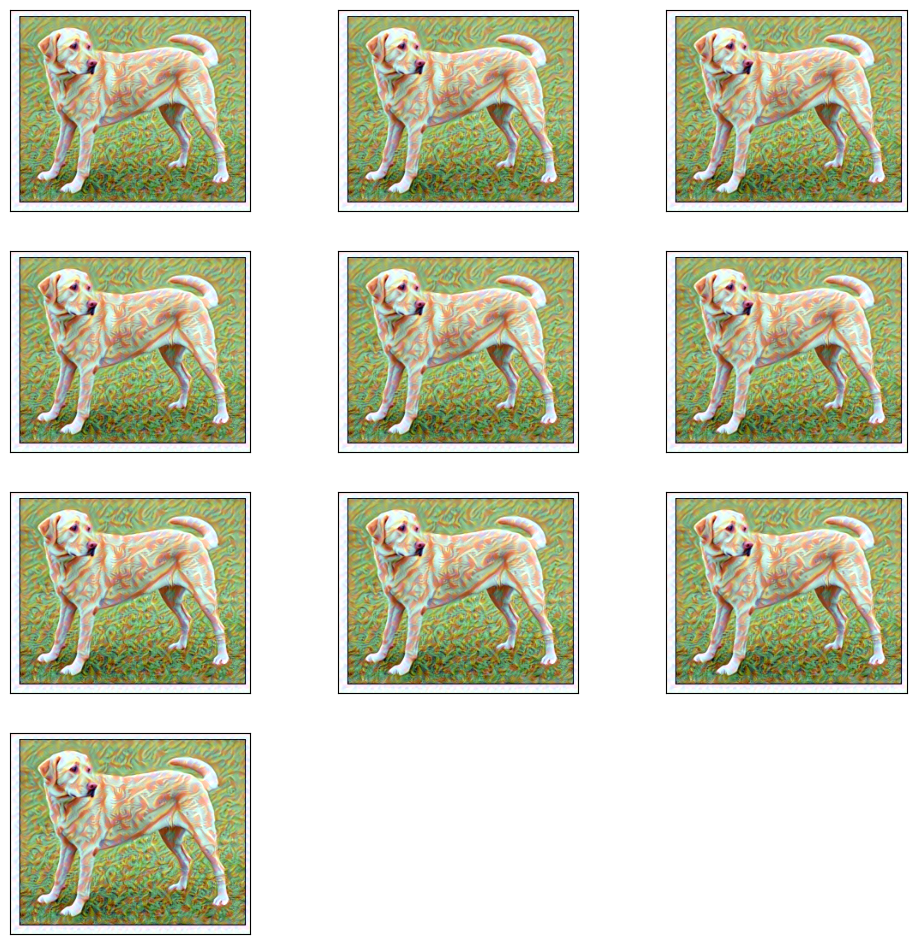

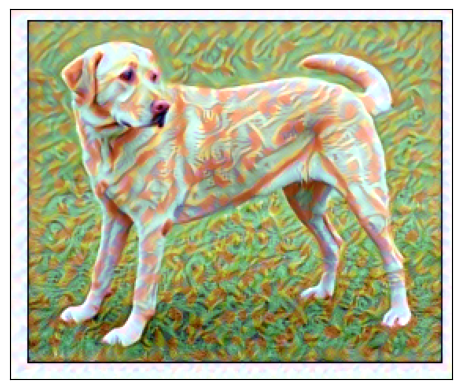

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(10):
    plt.subplot(4, 3, i + 1)
    display_image(generated_images[i+39])
plt.show()

# plot best result
display_image(final_img)